<a href="https://colab.research.google.com/github/rytzi/Durian-Ripeness-Detection-Model/blob/main/Gas_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [5]:
import pandas as pd

sensor_readings_df = pd.read_excel('/content/Aroma Training Data.xlsx', sheet_name='Sensor Readings', header=None).T
ripeness_labels_df = pd.read_excel('/content/Aroma Training Data.xlsx', sheet_name='Ripeness Labels', header=None)

sensor_readings_ripe = sensor_readings_df.values.tolist()

print(sensor_readings_df.shape)

(60, 20)


In [8]:
import pandas as pd

ripeness_labels_dict = dict(ripeness_labels_df.values)

ripe_readings = []
unripe_readings = []

for index, label in ripeness_labels_dict.items():
    if label == 'Ripe':
        ripe_readings.append(sensor_readings_df[index].tolist())
    elif label == 'Unripe':
        unripe_readings.append(sensor_readings_df[index].tolist())

print("Ripe Readings:")
print(ripe_readings)

print("\nUnripe Readings:")
print(unripe_readings)

Ripe Readings:
[[1133, 1031, 939, 1451, 944, 983, 1245, 1217, 1134, 1150, 954, 816, 813, 839, 929, 768, 813, 720, 975, 833], [1163, 1207, 1098, 1478, 1045, 1069, 1247, 1213, 1133, 1153, 1023, 894, 868, 930, 1023, 834, 800, 732, 1001, 859], [1190, 1311, 1175, 1441, 995, 1104, 1250, 1209, 1132, 1156, 1061, 938, 901, 959, 1060, 870, 848, 784, 1021, 874], [1222, 1363, 1236, 1429, 1072, 1129, 1255, 1205, 1131, 1159, 1079, 960, 915, 973, 1005, 837, 818, 752, 1035, 885], [1231, 1392, 1263, 1457, 1019, 1140, 1258, 1201, 1130, 1162, 1085, 975, 929, 978, 1079, 895, 878, 797, 1042, 892], [1232, 1222, 1276, 1447, 1084, 1149, 1260, 1197, 1129, 1165, 1086, 979, 935, 981, 1063, 866, 840, 801, 1048, 897], [1247, 1403, 1279, 1402, 1089, 1151, 1265, 1193, 1128, 1168, 1087, 983, 938, 976, 1068, 889, 881, 767, 1052, 900], [1239, 1405, 1280, 1446, 1091, 1150, 1268, 1189, 1127, 1171, 1083, 987, 937, 987, 1083, 900, 847, 796, 1056, 902], [1241, 1402, 1279, 1449, 1091, 1150, 1272, 1185, 1126, 1174, 1079, 987,

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

X_ripe = np.array(ripe_readings)
X_unripe = np.array(unripe_readings)

y_ripe = np.ones(len(ripe_readings))
y_unripe = np.zeros(len(unripe_readings))

X = np.concatenate((X_ripe, X_unripe), axis=0)
y = np.concatenate((y_ripe, y_unripe))

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    Dense(128, activation='relu', input_shape=(len(X_train[0]),)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/100
1/1 [==============================] - 1s 763ms/step - loss: 476.0482 - accuracy: 0.6250 - val_loss: 350.0267 - val_accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 410.3404 - accuracy: 0.5625 - val_loss: 281.8433 - val_accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 296.6416 - accuracy: 0.5000 - val_loss: 223.5950 - val_accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 349.7037 - accuracy: 0.6875 - val_loss: 173.2024 - val_accuracy: 0.2500
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 313.5188 - accuracy: 0.5000 - val_loss: 127.6691 - val_accuracy: 0.2500
Epoch 6/100
1/1 [==============================] - 0s 26ms/step - loss: 53.5302 - accuracy: 0.6875 - val_loss: 88.5173 - val_accuracy: 0.2500
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 103.4373 - accuracy: 0.6250 - val_loss: 58.7578 - val_accuracy: 0

In [12]:
import tensorflow as tf

# Save the model
model.save("ann_durio.h5")

# Convert the model to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('ann_model.tflite', 'wb') as f:
    f.write(tflite_model)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


.
.
.
.
.
.
.

.
.
.
.
.
.
.

.
.
.
.
.
.
.
.



In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler

# # Load the saved model
# model = tf.keras.models.load_model("fruit_ripeness_prediction_model.keras")

# # Provided data
# new_sensor_readings = np.array([795,833,859,874,885,892,897,900,902,903,903,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904,904]).reshape(1, -1)

# scaler = MinMaxScaler()
# scaler.fit_transform(np.zeros((1, 60)))

# new_sensor_readings_scaled = scaler.transform(new_sensor_readings)

# # Make predictions
# prediction = model.predict(new_sensor_readings_scaled)

# # Convert prediction to a human-readable format (e.g., ripe or not ripe)
# if prediction >= 0.5:
#     print("Predicted ripeness: Ripe")
# else:
#     print("Predicted ripeness: Not ripe")

1/1 [==============================] - 0s 140ms/step
Predicted ripeness: Ripe


In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler

# # Load the saved model
# model = tf.keras.models.load_model("fruit_ripeness_prediction_model.keras")

# # Assuming you have new sensor readings for which you want to predict ripeness
# new_sensor_readings = np.random.rand(10).reshape(1, -1)  # Example new sensor readings

# # Load the scaler used during training
# scaler = MinMaxScaler()  # Initialize a new scaler
# scaler.fit_transform(np.zeros((1, 10)))  # Fit the scaler to any dummy data to initialize its parameters

# # Normalize the input features using the loaded scaler
# new_sensor_readings_scaled = scaler.transform(new_sensor_readings)

# # Make predictions
# prediction = model.predict(new_sensor_readings_scaled)

# # Convert prediction to a human-readable format (e.g., ripe or not ripe)
# if prediction >= 0.5:
#     print("Predicted ripeness: Ripe")
# else:
#     print("Predicted ripeness: Not ripe")

1/1 [==============================] - 0s 65ms/step
Predicted ripeness: Not ripe


In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import MinMaxScaler

# # Load the saved model
# model = tf.keras.models.load_model("fruit_ripeness_prediction_model.keras")

# # Assuming you have new sensor readings for which you want to predict ripeness
# new_sensor_readings = np.random.rand(10).reshape(1, -1)  # Example new sensor readings

# # Load the scaler used during training
# scaler = MinMaxScaler()  # Initialize a new scaler
# scaler.fit_transform(np.zeros((1, 10)))  # Fit the scaler to any dummy data to initialize its parameters

# # Normalize the input features using the loaded scaler
# new_sensor_readings_scaled = scaler.transform(new_sensor_readings)

# # Define a TensorFlow function for prediction
# @tf.function
# def predict(input_data):
#     return model(input_data)

# # Make predictions using the TensorFlow function
# prediction = predict(tf.convert_to_tensor(new_sensor_readings_scaled, dtype=tf.float32))

# # Convert prediction to a human-readable format (e.g., ripe or not ripe)
# if prediction >= 0.5:
#     print("Predicted ripeness: Ripe")
# else:
#     print("Predicted ripeness: Not ripe")


Predicted ripeness: Ripe


You can connect your Jupyter Notebook, Flutter app, and Firebase together to create a seamless data pipeline. Here's a high-level overview of how you can achieve this:

Firebase Setup:

Set up a Firebase project in the Firebase console.
Enable the necessary Firebase services such as Firestore, Authentication, or Cloud Storage, depending on your requirements.
Firestore Integration:

Use the Firebase SDK to integrate Firestore into your Flutter app. Firestore is a NoSQL cloud database provided by Firebase.
You can use Firestore to store and retrieve data from your Flutter app.
Flutter App:

Develop your Flutter app and integrate Firebase SDKs using packages like firebase_core, cloud_firestore, firebase_auth, etc.
Use Firebase Authentication for user authentication if needed.
Implement functionality to read from and write to Firestore. This could involve fetching data from Firestore to display in your app, as well as allowing users to submit data to Firestore.
Jupyter Notebook:

Use the Firebase Admin SDK for Python to interact with Firebase services from your Jupyter Notebook.
Authenticate your Notebook with Firebase using a service account.
Use the Firebase Admin SDK to read from and write to Firestore, Cloud Storage, or other Firebase services directly from your Notebook.
Connecting Jupyter Notebook with Flutter App:

Expose an API or create a backend service (using Flask, Django, or any other backend framework) that interacts with Firebase using the Firebase Admin SDK.
Your Flutter app can then make HTTP requests to this API to fetch data from Firestore or perform other operations.
Real-time Updates:

Both Firestore and Firebase Realtime Database offer real-time synchronization and can notify your app of data changes in real time.
You can set up listeners in your Flutter app to receive real-time updates from Firestore whenever data changes.
Security Rules:

Implement Firebase Security Rules to control access to your data. Security rules allow you to specify who can read and write data in Firestore based on various conditions.
Deployment:

Deploy your Flutter app to app stores (Google Play Store, Apple App Store) and your backend service to a hosting provider like Firebase Hosting or Google Cloud Platform.
By following these steps, you can create a connected system where your Flutter app interacts with Firebase services for data storage and authentication, and your Jupyter Notebook can analyze and manipulate data stored in Firebase using the Firebase Admin SDK.

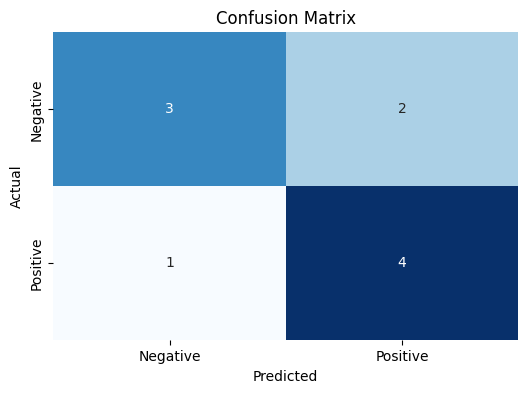

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels and predicted labels
true_labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # Example true labels
predicted_labels = [1, 0, 1, 1, 1, 0, 0, 0, 1, 1]  # Example predicted labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Define labels for confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the confusion matrix for visualization
conf_matrix_flatten = np.array(conf_matrix).flatten()

# Define colors for the confusion matrix cells
colors = ['lightgray', 'lightcoral', 'lightcoral', 'lightgray']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix.reshape(2, 2), annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
